# Problem Statement
- Consider the dataset "zoo.csv" and look at the information provided in the first five rows. The first column denotes the animals name and the last one specifies the high-level class for the corresponding animals.you are supposed to find a solution to the following question:
1. Identify the unique number of high-level classes.
2. Perform agglomerative clustering using the 16 intermediate features.
3. Compute the mean squared error by comparing the actual high-level classand the predicted high-level class.

- In a nutshell, we just have to perform agglomerative clustering with the appropriate MSE value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
data  = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\Simplilearn\Machine Learning\dataset\zoo.csv")

In [4]:
# !8 Columns in Total and 101 Entries 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


[1 2 3 4 5 6 7]


<AxesSubplot:>

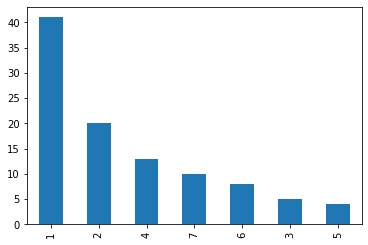

In [5]:
labels = data['class_type']
print(np.unique(labels.values))

fig, ax = plt.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')

- From the plot, it can be seen that we have seven unique class labels
- Now, since we are about the group animals based on their features, its clear and quite predictive that clustering should be performed.

In [6]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
# Now extract the features leaving the label column and store them in another dataframe say features
features = data.values[:,1:-1]
features.shape

(101, 16)

In [8]:
# Import necessary liabraries/modules for performing clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

#Specify the number of clusters beacause there are seven unique class labels methodand also define linkage method
# as average  and  similarities method as cosine
model = AgglomerativeClustering(n_clusters=7,linkage="average",affinity='cosine')

In [9]:
# Fit the model
model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [10]:
# Lets us extract the labels predicted by our model against the features
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

In [11]:
print(np.unique(model.labels_))
 
labels = labels-1

[0 1 2 3 4 5 6]


- We can see that we have predicted labels against all of our 101 animals altough we have seven labels, but it is number as six, so in this case we can subtract one from our orignal label column, such that it matches the predicted number.

In [12]:
# Now, predict the accuracy of our model
from sklearn.metrics import mean_squared_error

score = mean_squared_error(labels, model.labels_)

In [13]:
# Now evaluate the absolute error by applying the square root operation on the mean squared error
abs_error = np.sqrt(score)
print(abs_error)

2.4373333911071624


- The root mean squared error we got is 2.43 approximately which is quite acceptable 

# ___Summary Table___

### Step-1 : Import Liabraries and Dataset
### Step-2 : Check for missing values
### Step-3 : Identify unique labels and plot them
### Step-4 : Extract feature necessry for clustering with in a single variable 
### Step-5 : Fit agglomerative clustering model on feature data
### Step-6 : Predicts lablels for each animal
### Step-7 : Print RMSE of the model